# Plots used to supplement Responsible Sourcing and Investment Policy Number 4 (RSI 4)
#### Reducing Greenhouse Gas Emissions and Water Usage, and Incentivizing and Supporting Environmentally Conscious Dining through Sustainably & Ethically Sourced Food & Beverage Purchases.

##### Author: Akash Satpathy

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from collections import Counter

In [25]:
# Akash's plotting preferences
plt.rcParams['axes.facecolor'] = 'whitesmoke'
COLOR = 'darkslategray'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = 'darkslategray'
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
plt.rcParams["font.family"] = "monospace"
mpl.rcParams['figure.figsize'] = [18, 14]
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

### Estimating number of meals and GHG emission from one chicken and tofu sandwich

**For number of meals:** average number of meals served every day x (number of weeks in the fall + spring semester) x number of days in a week

**For sandwiches:** Weight of chicken/plant patty in kg x emissions of the item per kg + weight of cheese/nut-cheese slice in kg x emissions of the item per kg + weight of wheat bun in kg x emissions of the item per kg

In [26]:
# here, yearly_meals_lb means yearly meals lowerbound
yearly_meals_lb = 30000 * 32 * 7
chicken_sandwich = 0.113 * 9.87 + 0.025 * 23.88 + 0.057 * 1.57
tofu_sandwich = 0.113 * 3.16 + 0.025 * 0.43 + 0.057 * 1.57

## Plotting emissions as a bar plot

Five different scenarios were assumed here with different ratios of meat and plant sandwiches being sold by weight. 

In [27]:
# computing the contribution of chicken and tofu to each scenario
chicken_contribution = {
    "100:0": 1.0 * chicken_sandwich,
    "75:25": 0.75 * chicken_sandwich,
    "50:50": 0.50 * chicken_sandwich,
    "25:75": 0.25 * chicken_sandwich,
    "0:100": 0.0 * chicken_sandwich,
}

tofu_contribution = {
    "100:0": 0.0 * tofu_sandwich,
    "75:25": 0.25 * tofu_sandwich,
    "50:50": 0.50 * tofu_sandwich,
    "25:75": 0.75 * tofu_sandwich,
    "0:100": 1.0 * tofu_sandwich,
}

# multiplying by yearly_meals_lb to get total CO2eq emissions
chicken_co2eq = {scenario: co2eq * yearly_meals_lb for scenario, co2eq in chicken_contribution.items()}
tofu_co2eq = {scenario: co2eq * yearly_meals_lb for scenario, co2eq in tofu_contribution.items()}


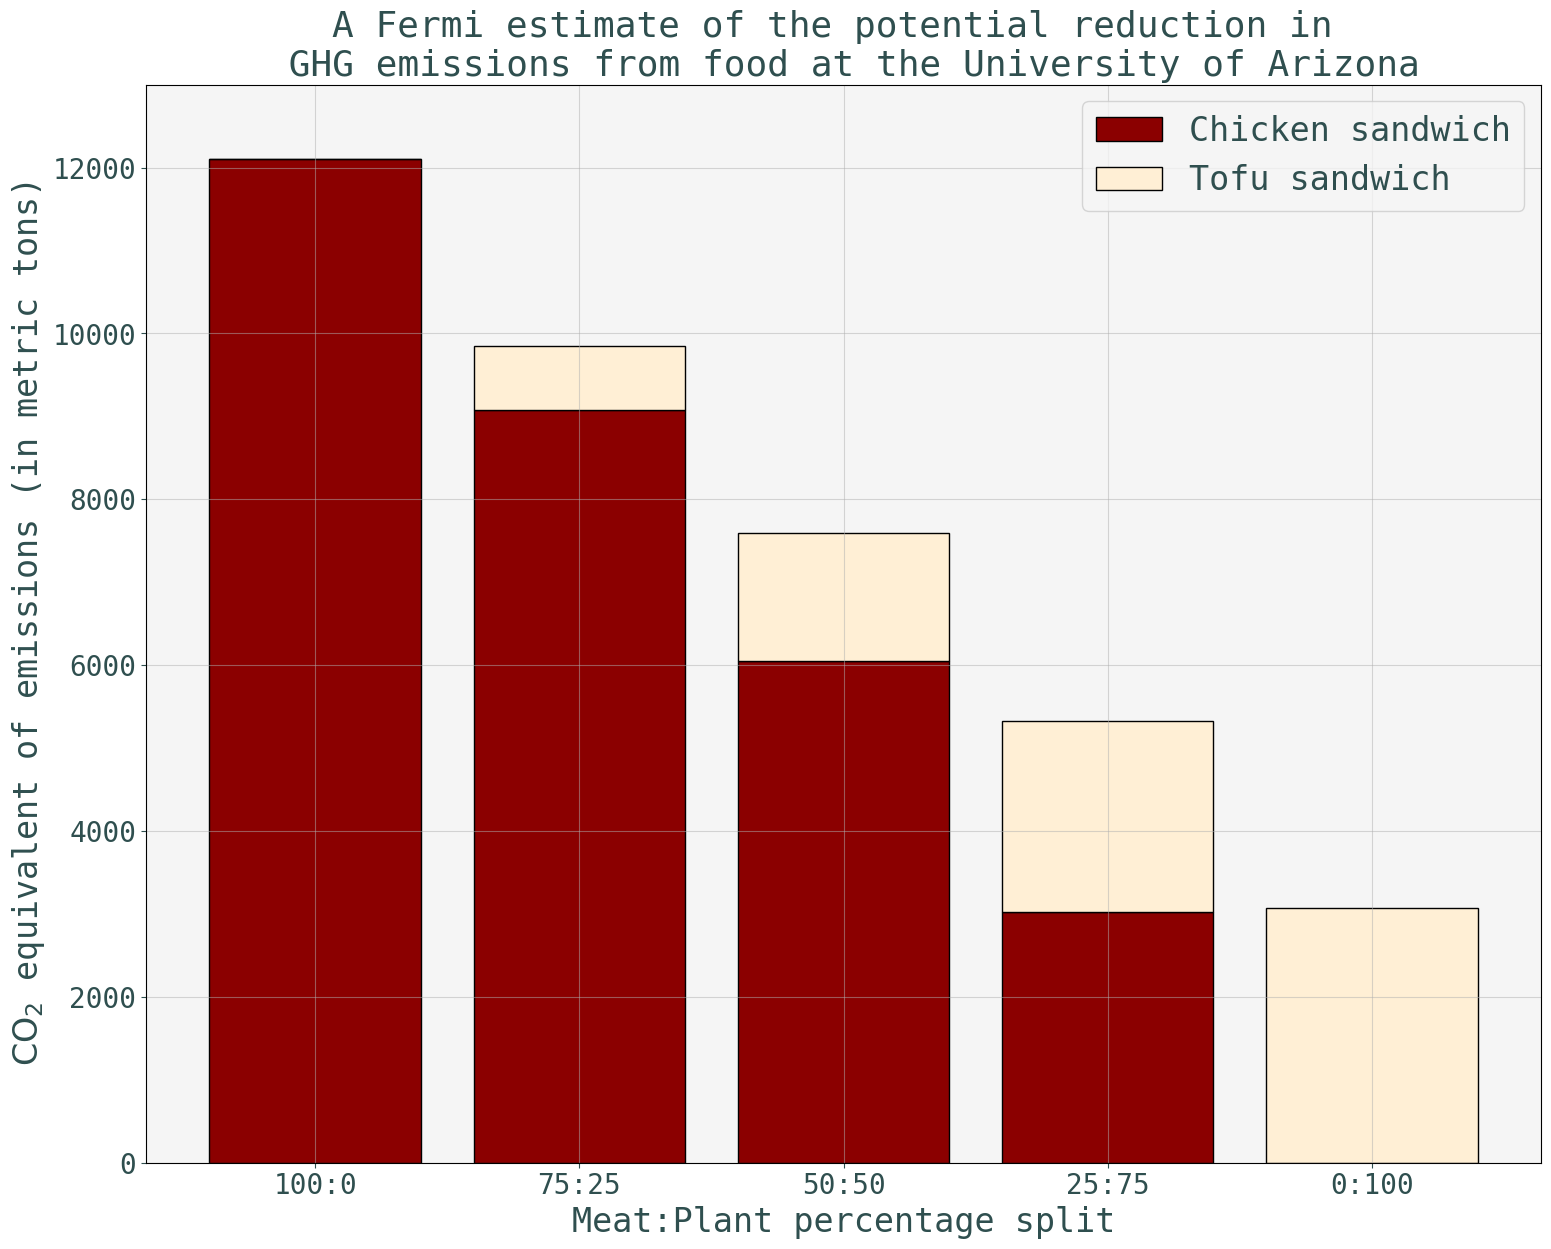

In [28]:
scenarios = list(tofu_contribution.keys())

# adding the chicken and tofu contributions for each scenario
# converting each to MT CO2eq
chicken_values = [chicken_co2eq[scenario] / 1e3 for scenario in scenarios] 
tofu_values = [tofu_co2eq[scenario] / 1e3 for scenario in scenarios]

# creating the bar chart for the chicken sandwich
plt.bar(scenarios, chicken_values, label='Chicken sandwich', color="darkred", 
        edgecolor="black")

# stacking the two bars
plt.bar(scenarios, tofu_values, bottom=chicken_values, label='Tofu sandwich', 
        color="papayawhip", edgecolor="black")

# adding labels and title
plt.xlabel("Meat:Plant percentage split")
plt.ylabel(r"$\mathrm{CO_{2}}$ equivalent of emissions (in metric tons)")
plt.title("A Fermi estimate of the potential reduction in \n GHG emissions from "
          "food at the University of Arizona")
plt.legend(fontsize=24)

plt.grid(alpha=0.5)
plt.ylim(0, 13000)

plt.savefig("./plots/fermi_estimate_food_UA.png", dpi=600,
            bbox_inches="tight")

In [8]:
combined_estimated_emissions = [i + j for i, j in zip(chicken_values, tofu_values)]

In [9]:
for i in range(1, 5):
    percent_reduction = np.round(
        (100 * np.abs(combined_estimated_emissions[i] - combined_estimated_emissions[0]) / combined_estimated_emissions[0]), 
        2
    )
    
    print(
        f"Potential reduction in GHG emissions going from {scenarios[0]} to "
        f"{scenarios[i]} meat-to-plant ratio: "
        f"{percent_reduction}%."
    )

Potential reduction in GHG emissions going from 100:0 to 75:25 meat-to-plant ratio: 18.65%.
Potential reduction in GHG emissions going from 100:0 to 50:50 meat-to-plant ratio: 37.31%.
Potential reduction in GHG emissions going from 100:0 to 25:75 meat-to-plant ratio: 55.96%.
Potential reduction in GHG emissions going from 100:0 to 0:100 meat-to-plant ratio: 74.62%.


### Estimating number of meals and water usage from one chicken and tofu sandwich

**For number of meals:** average number of meals served every day x (number of weeks in the fall + spring semester) x number of days in a week

**For sandwiches:** Weight of chicken/plant patty in kg x liters of freshwater withdrawals of the item per kg + weight of cheese/nut-cheese slice in kg x iters of freshwater withdrawals of the item per kg + weight of wheat bun in kg x iters of freshwater withdrawals of the item per kg

In [12]:
yearly_meals_lb = 30000 * 32 * 7
chicken_sandwich = 0.113 * 660 + 0.025 * 5605 + 0.057 * 648
tofu_sandwich = 0.113 * 149 + 0.025 * 4134 + 0.057 * 648

# hashed out below for consistency, but groundnut cheese will have even
# lower water usage
# tofu_sandwich = 0.113 * 149 + 0.025 * 2452 + 0.057 * 648 

In [14]:
# computing the contribution of chicken and tofu to each scenario
chicken_contribution = {
    "100:0": 1.0 * chicken_sandwich,
    "75:25": 0.75 * chicken_sandwich,
    "50:50": 0.50 * chicken_sandwich,
    "25:75": 0.25 * chicken_sandwich,
    "0:100": 0.0 * chicken_sandwich,
}

tofu_contribution = {
    "100:0": 0.0 * tofu_sandwich,
    "75:25": 0.25 * tofu_sandwich,
    "50:50": 0.50 * tofu_sandwich,
    "25:75": 0.75 * tofu_sandwich,
    "0:100": 1.0 * tofu_sandwich,
}

# multiplying by yearly_meals_lb to get total CO2eq emissions
chicken_water = {scenario: water * yearly_meals_lb for scenario, water in 
             chicken_contribution.items()}
tofu_water = {scenario: water * yearly_meals_lb for scenario, water 
              in tofu_contribution.items()}

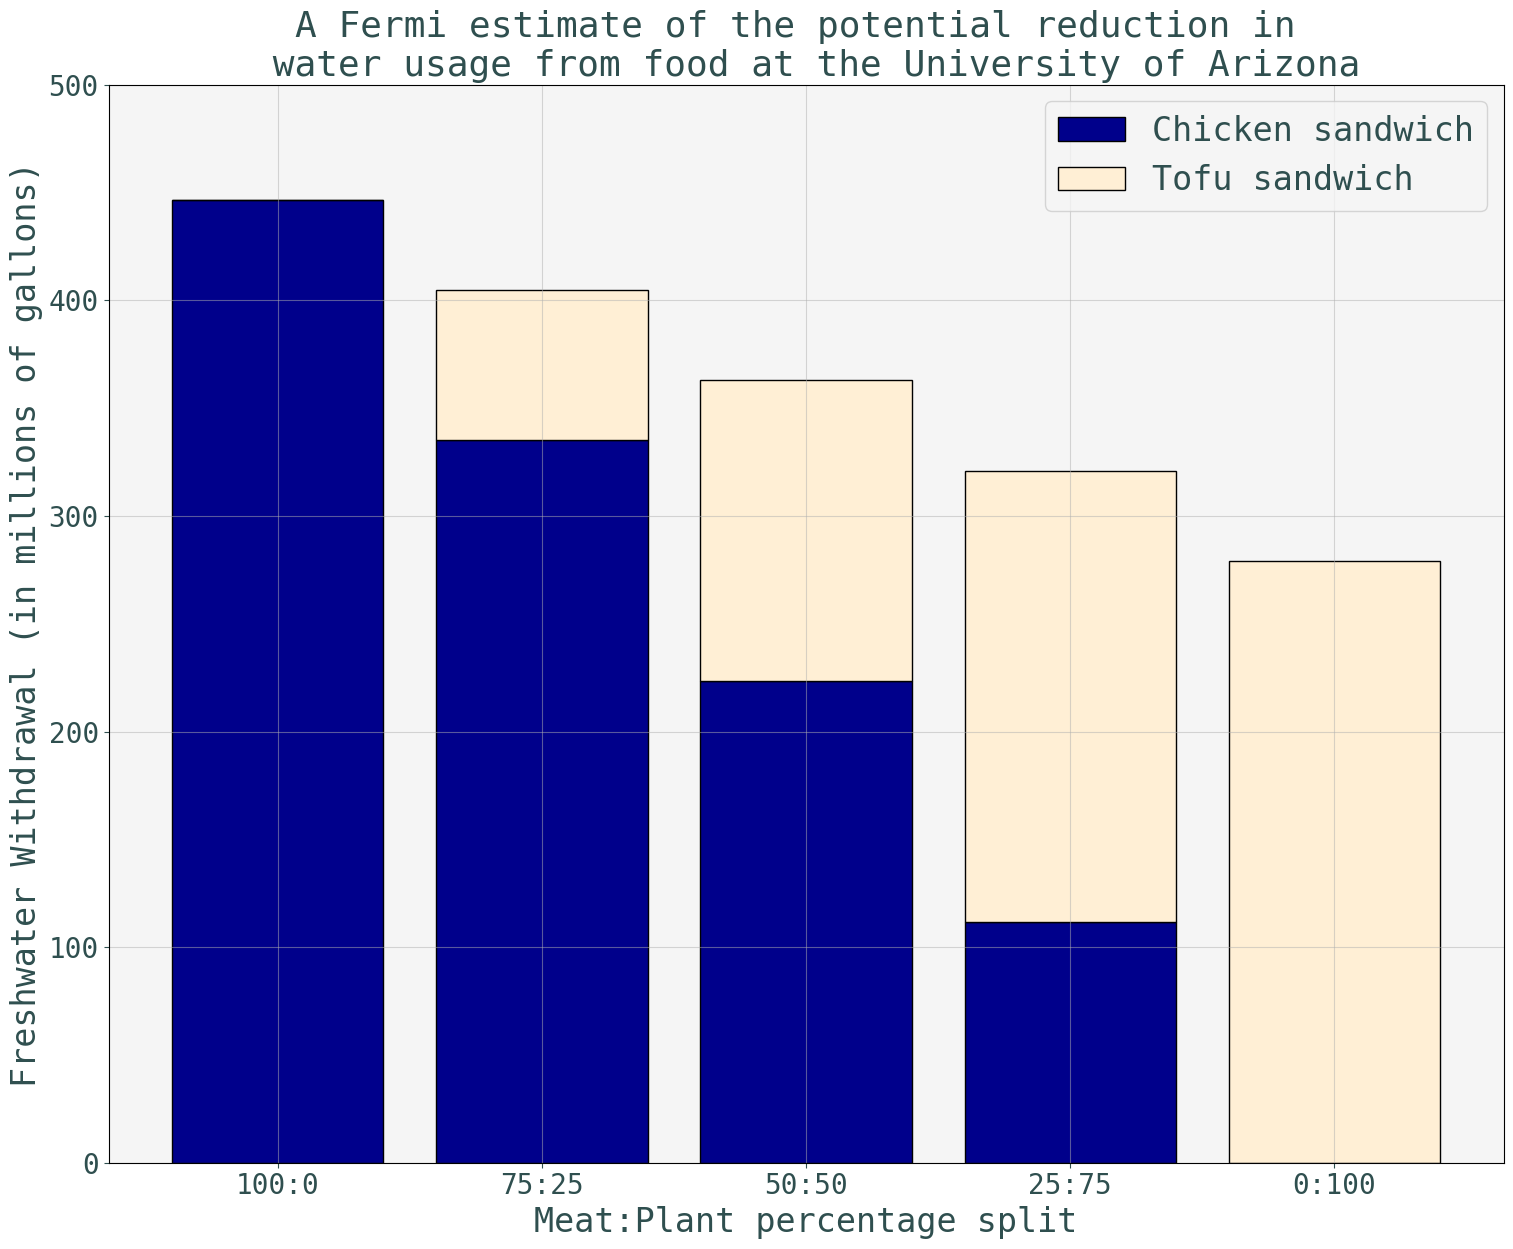

In [15]:
scenarios = list(tofu_contribution.keys())

# adding the chicken and tofu contributions for each scenario
# converting each to millions of gallons
chicken_values = [chicken_water[scenario] * 0.264172 / 1e6 for scenario in scenarios] 
tofu_values = [tofu_water[scenario] * 0.264172 / 1e6 for scenario in scenarios]

# creating the bar chart for the chicken sandwich
plt.bar(scenarios, chicken_values, label='Chicken sandwich', color="darkblue", 
        edgecolor="black")

# stacking the two bars
plt.bar(scenarios, tofu_values, bottom=chicken_values, label='Tofu sandwich', 
        color="papayawhip", edgecolor="black")

# adding labels and title
plt.xlabel("Meat:Plant percentage split")
plt.ylabel("Freshwater Withdrawal (in millions of gallons)")
plt.title("A Fermi estimate of the potential reduction in \n water usage from "
          "food at the University of Arizona")
plt.legend(fontsize=24)

plt.grid(alpha=0.5)
plt.ylim(0, 500)

plt.savefig("./plots/fermi_estimate_water_UA.png", dpi=600,
            bbox_inches="tight")

In [17]:
combined_estimated_water = [i + j for i, j in zip(chicken_values, tofu_values)]

In [18]:
for i in range(1, 5):
    percent_reduction = np.round(
        (100 * np.abs(combined_estimated_water[i] - combined_estimated_water[0]) /
         combined_estimated_water[0]), 
        2
    )
    
    print(
        f"Potential reduction in freshwater withdrawals going from {scenarios[0]} to "
        f"{scenarios[i]} meat-to-plant ratio: "
        f"{percent_reduction}%."
    )

Potential reduction in freshwater withdrawals going from 100:0 to 75:25 meat-to-plant ratio: 9.39%.
Potential reduction in freshwater withdrawals going from 100:0 to 50:50 meat-to-plant ratio: 18.78%.
Potential reduction in freshwater withdrawals going from 100:0 to 25:75 meat-to-plant ratio: 28.17%.
Potential reduction in freshwater withdrawals going from 100:0 to 0:100 meat-to-plant ratio: 37.56%.


## Plotting food prices for some protein-rich plant-based and meat items  

In [36]:
food_price = pd.read_csv("./food_prices_pb_vs_other.csv")

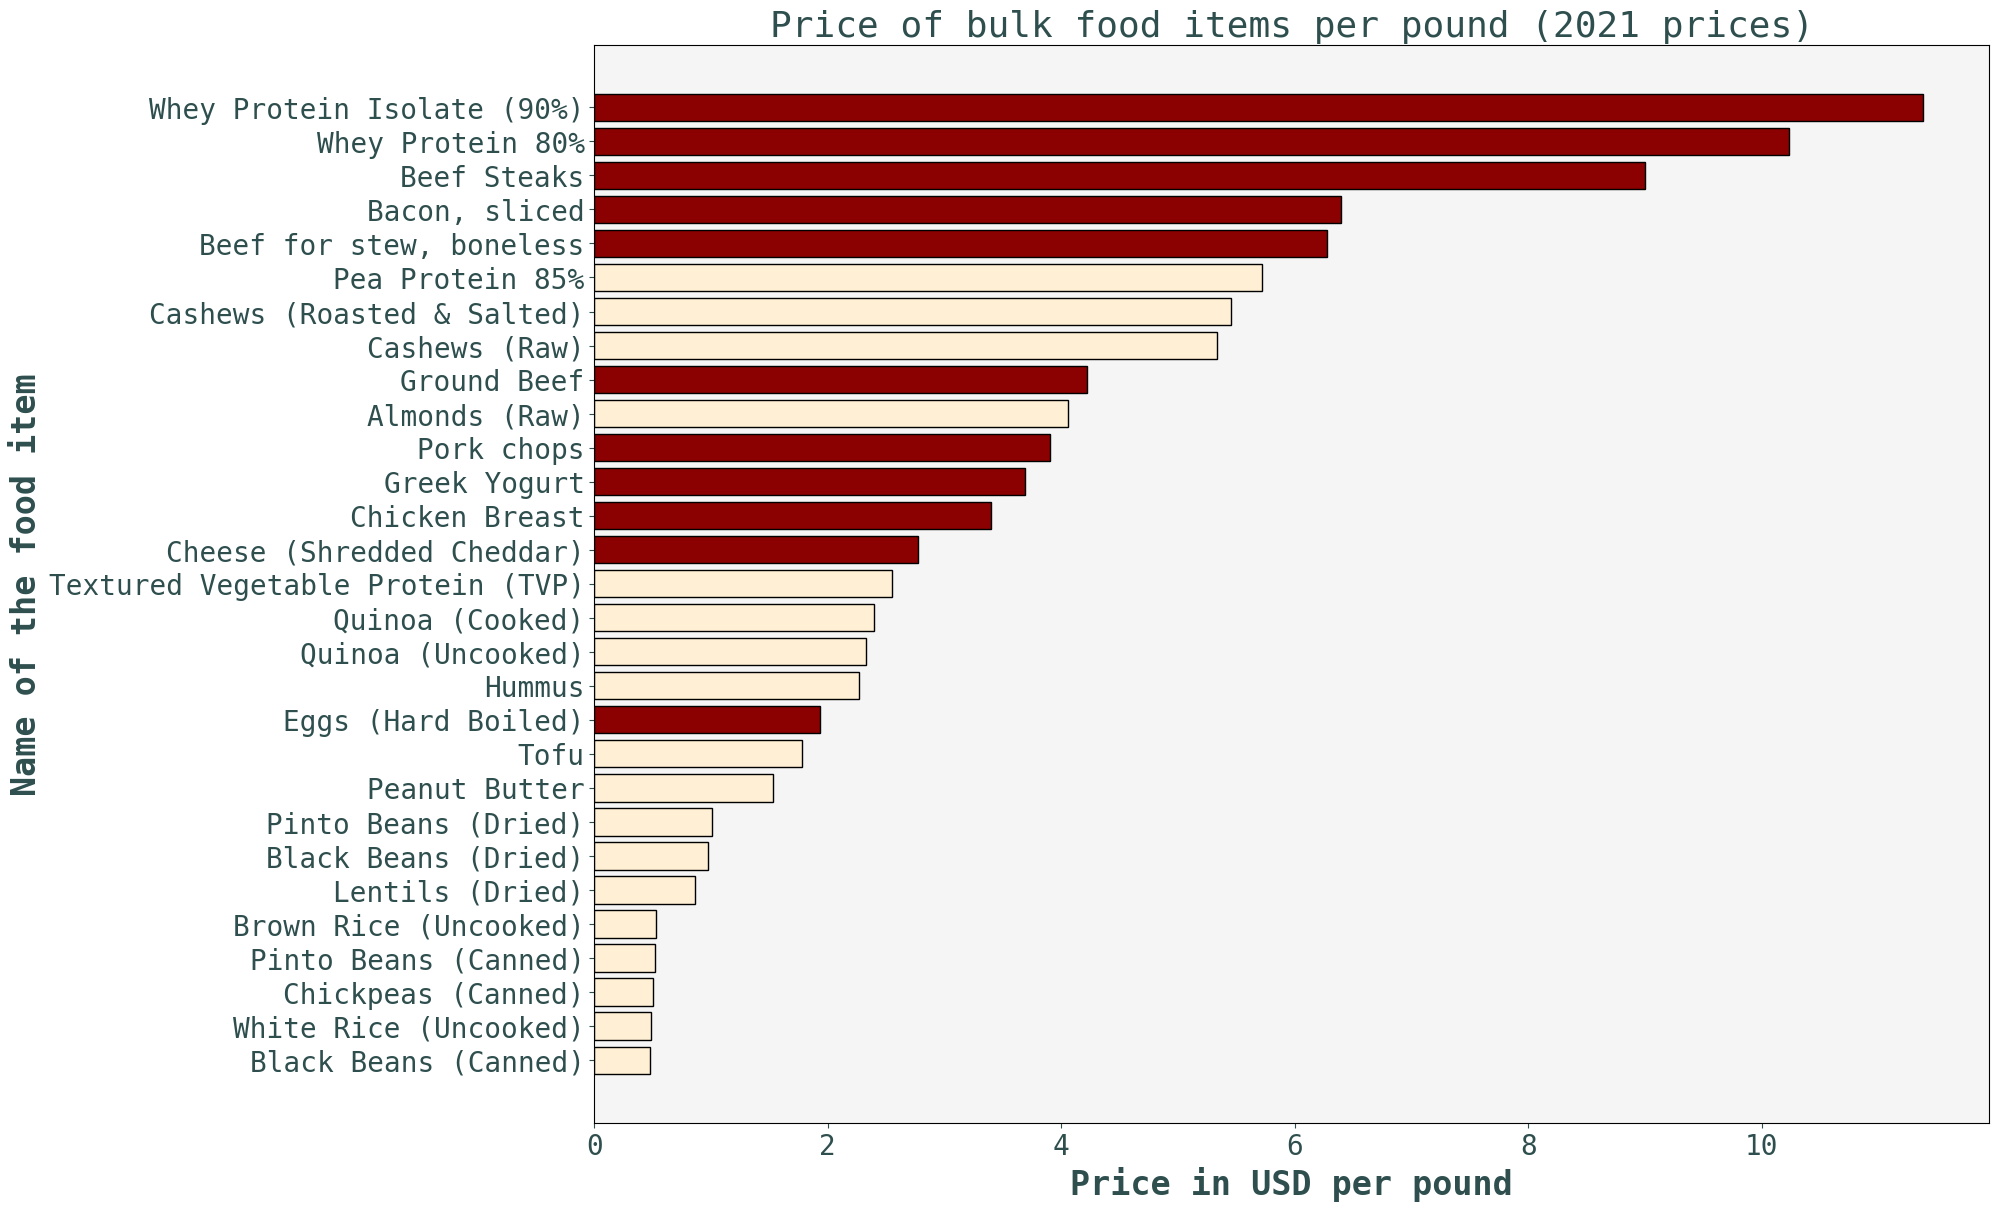

In [41]:
food_price_subset = {
    'PB': food_price["PB?"],
    'food': food_price["Food Item"],
    'price_per_lb': [float(i[1:]) for i in food_price["Price per pound"]],
}

food_price_subset = pd.DataFrame(food_price_subset)

food_price_sorted = food_price_subset.sort_values('price_per_lb', ascending=True)
colors = ['papayawhip' if pb == 'Vegan' else 'darkred' for pb in food_price_sorted['PB']]

plt.barh(food_price_sorted["food"], food_price_sorted["price_per_lb"], 
         edgecolor="black", color=colors)
plt.xlabel("Price in USD per pound", fontweight="bold")
plt.ylabel("Name of the food item", fontweight="bold")
plt.title("Price of bulk food items per pound (2021 prices)")
plt.savefig("./plots/price_per_pound.png", dpi=600, bbox_inches="tight")

## Broad Input Survey Results

In [20]:
input_survey = pd.read_csv("./broad_input_survey.csv")

In [21]:
input_survey = input_survey.iloc[1:]
#input_survey = input_survey[input_survey["Progress"] == "100"]

In [22]:
questions = [
    "In which of the following areas do you think the University of\nArizona is doing "
    "well to advance sustainability and climate action?",
    
    "In which of the following area(s) do you think the University\nof Arizona could do "
    "more to improve sustainability?",
    
    "Which one of the following areas should the"
    "\nUniversity prioritize to improve sustainability?"
]

In [23]:
for i in [1, 2, 3,]: 
    # splitting the responses, flattening the list, and counting number of responses
    input_survey_1 = input_survey.dropna(subset=[f"S2.Q{i}"])
    responses = input_survey_1[f"S2.Q{i}"].str.split(',').sum()
    response_counts = Counter(responses)
    sorted_responses = response_counts.most_common()
    
    # extracting responses and frequencies from the sorted list
    responses, frequencies = zip(*sorted_responses)
    responses = responses[::-1]
    frequencies = frequencies[::-1]
    
    colors = [
        'papayawhip' if i == 'Food Options' or i == "Water Conservation" 
                        or i =="Greenhouse Gas Emissions Reductions" 
        or i == "Purchasing" else "slategrey" 
        for i in responses
    ]
    
    # creating a bar chart
    plt.barh(responses, frequencies,
             edgecolor="black", color=colors)
   
    plt.xlabel("Number of responses")
    plt.ylabel("Climate Action Plan Areas")
    plt.title(questions[i - 1])
    plt.grid(axis="x", alpha=0.5)
    
    #plt.show()
    plt.savefig(
        f"./plots/broad_input_survey_{i}.png",
        dpi=600, bbox_inches="tight"
    )
    
    # clear the figure
    plt.clf()

<Figure size 1800x1400 with 0 Axes>

In [4]:
# old attempt, redundant now

# scenario_to_co2eq_per_item = {
#     "100:0": chicken_sandwich,
#     "75:25": 0.75 * chicken_sandwich + 0.25 * tofu_sandwich,
#     "50:50": 0.50 * chicken_sandwich + 0.50 * tofu_sandwich,
#     "25:75": 0.25 * chicken_sandwich + 0.75 * tofu_sandwich,
#     "0:100": tofu_sandwich,
# }
# 
# scenario_to_co2eq = {
#     i: j * yearly_meals_lb for i, j in zip(
#         scenario_to_co2eq_per_item.keys(), scenario_to_co2eq_per_item.values()
#     )
# }